# Ejercicio 2

Descarga la estructura de la proteína lisozima del huevo de gallina (código PDB: 1LYZ), visualízala, y carga el archivo en Biopython (creando un objeto estructura). 

In [11]:
from functions import download_pdb
import warnings, py3Dmol, math
from Bio.PDB import PDBParser
from Bio.PDB.vectors import calc_angle
import nglview as nv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 1. Descarga la estructura de proteína lisozima del huevo de gallina (código PDB: 1LYZ)

In [2]:
route = download_pdb("1LYZ", "./files/1LYZ.pdb")

Archivo PDB '1LYZ.pdb' descargado exitosamente en './files/1LYZ.pdb'.


### 2. Visualización de la estructura de la proteína lisoima del huevo de gallina

In [3]:
warnings.filterwarnings("ignore")

parser = PDBParser(QUIET=True)
pdb_code = "1LYZ"

structure = parser.get_structure(pdb_code, f"./files/{pdb_code}.pdb")

print(f"Modelo(s) en la estructura: {len(structure)}")
for model in structure:
    print(f"Modelo {model.id} tiene {len(model)} cadena.")

Modelo(s) en la estructura: 1
Modelo 0 tiene 1 cadena.


In [4]:
view = nv.show_biopython(structure)
view.clear_representations()
view.add_representation('cartoon', selection='protein')
view.add_representation('ball+stick', selection='heme')
view

NGLWidget()

In [5]:
with open(route, 'r') as archivo:
    pdb_data = archivo.read()

chains =  list(structure.get_chains())
colours_list = ['cyan', 'magenta', 'yellow', 'green', 'orange', 'purple', 'blue', 'red']
colours = {chain.id: colours_list[idx % len(colours_list)] for idx, chain in enumerate(chains)}

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')
for chain_id, color in colours.items():
    view.addStyle({'chain': chain_id}, {'cartoon': {'color': color}})
view.addStyle({'resn': 'HEM'}, {'stick': {'colorscheme': 'redCarbon'}})
view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

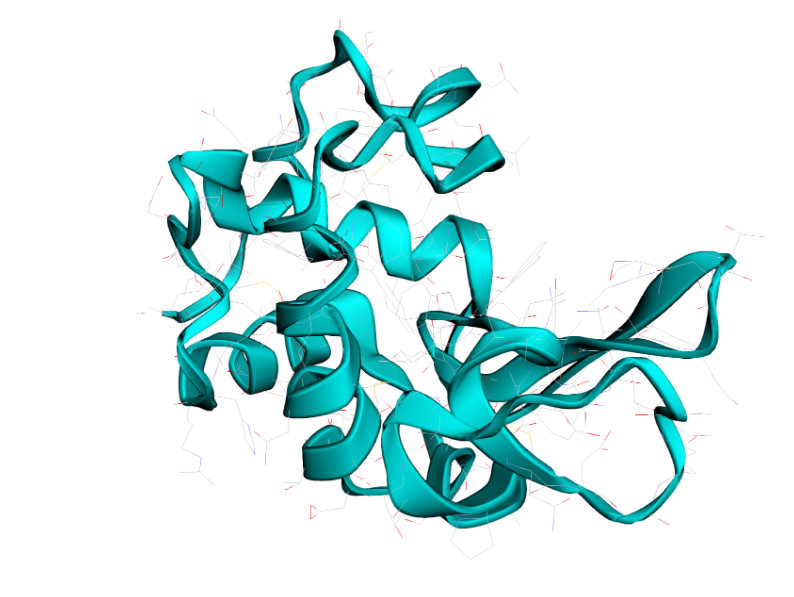

In [12]:
image_path = "./results/estructura_2.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (a) Imprima el número de átomos y proporcione el nombre del primer y último átomo de la lista.

In [6]:
atoms = list(structure.get_atoms())

num_atoms = len(atoms)
first_atom = atoms[0].get_name()
last_atom = atoms[-1].get_name()

print(f"Número de átomos: {num_atoms}")
print(f"Nombre del primer átomo: {first_atom}")
print(f"Nombre del último átomo: {last_atom}")

Número de átomos: 1102
Nombre del primer átomo: N
Nombre del último átomo: O


In [7]:
with open(route, 'r') as archivo:
    pdb_data = archivo.read()

chains = list(structure.get_chains())
colours_list = ['cyan', 'magenta', 'yellow', 'green', 'orange', 'purple', 'blue', 'red']
colours = {chain.id: colours_list[idx % len(colours_list)] for idx, chain in enumerate(chains)}

atoms = list(structure.get_atoms())
first_atom = atoms[0]
last_atom = atoms[-1]
first_atom_serial = int(first_atom.get_serial_number())
first_atom_name = first_atom.get_name()
first_atom_coords = first_atom.get_coord()
last_atom_serial = int(last_atom.get_serial_number())
last_atom_name = last_atom.get_name()
last_atom_coords = last_atom.get_coord()

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')

for chain_id, color in colours.items():
    view.addStyle({'chain': chain_id}, {'cartoon': {'color': color, 'opacity': 0.6}})

view.addStyle({'resn': 'HEM'}, {'stick': {'colorscheme': 'redCarbon'}})

view.addStyle({'serial': first_atom_serial}, {
    'sphere': {'radius': 0.9, 'color': 'green'},
    'stick': {'color': 'green'}
})

view.addLabel(first_atom_name, {
    'position': {
        'x': float(first_atom_coords[0]),
        'y': float(first_atom_coords[1]),
        'z': float(first_atom_coords[2])
    },
    'backgroundColor': 'white',
    'fontColor': 'green',
    'fontSize': 16,
    'fontFamily': 'Arial'
})
9
view.addStyle({'serial': last_atom_serial}, {
    'sphere': {'radius': 0.9, 'color': 'red'},
    'stick': {'color': 'red'}
})

view.addLabel(last_atom_name, {
    'position': {
        'x': float(last_atom_coords[0]),
        'y': float(last_atom_coords[1]),
        'z': float(last_atom_coords[2])
    },
    'backgroundColor': 'white',
    'fontColor': 'red',
    'fontSize': 16,
    'fontFamily': 'Arial'
})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

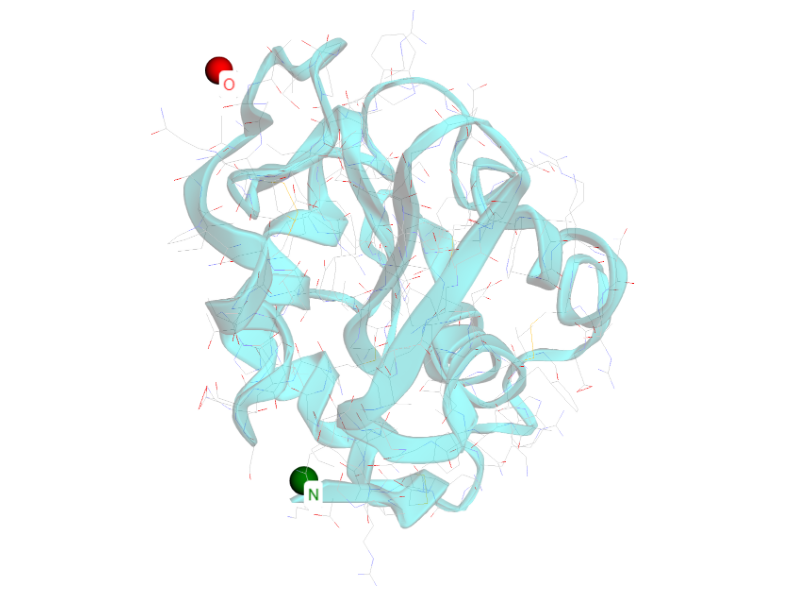

In [13]:
image_path = "./results/ej_2_a.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (b) Calcula el ángulo entre los tres primeros átomos de la lista y muestre su valor en grados. 

In [8]:
atom1, atom2, atom3 = atoms[0], atoms[1], atoms[2]

vector1 = atom1.get_vector()
vector2 = atom2.get_vector()
vector3 = atom3.get_vector()

angle = calc_angle(vector1, vector2, vector3)
angle_deg = math.degrees(angle)
print(f"Ángulo entre los vectores: {angle_deg:.2f} grados")

Ángulo entre los vectores: 118.36 grados


In [9]:
special_atoms = [atom1, atom2, atom3]
special_colours = ['green', 'blue', 'red']
view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')

for idx, atom in enumerate(special_atoms):
    coords = atom.get_coord()
    color = special_colours[idx]

    view.addSphere({
        'center': {'x': float(coords[0]), 'y': float(coords[1]), 'z': float(coords[2])},
        'radius': 0.5,
        'color': color
    })

    view.addLabel(atom.get_name(), {
        'position': {'x': float(coords[0]), 'y': float(coords[1]), 'z': float(coords[2])},
        'backgroundColor': 'white',
        'fontColor': color,
        'fontSize': 12
    })

cylinder_pairs = [(atom1, atom2, 'green'), (atom2, atom3, 'red')]
for start_atom, end_atom, color in cylinder_pairs:
    start_coords = start_atom.get_coord()
    end_coords = end_atom.get_coord()
    view.addCylinder({
        'start': {'x': float(start_coords[0]), 'y': float(start_coords[1]), 'z': float(start_coords[2])},
        'end': {'x': float(end_coords[0]), 'y': float(end_coords[1]), 'z': float(end_coords[2])},
        'radius': 0.05,
        'color': color
    })

def draw_arc(center, start, end, color, radius=1.5, steps=30):
    theta1 = np.arctan2(float(start[1] - center[1]), float(start[0] - center[0]))
    theta2 = np.arctan2(float(end[1] - center[1]), float(end[0] - center[0]))

    if theta2 < theta1:
        theta2 += 2 * np.pi

    angles = np.linspace(theta1, theta2, steps)
    points = []
    for theta in angles:
        x = float(center[0]) + np.cos(theta) * radius
        y = float(center[1]) + np.sin(theta) * radius
        z = float(center[2])
        points.append((x, y, z))

    for i in range(len(points) - 1):
        view.addCylinder({
            'start': {'x': points[i][0], 'y': points[i][1], 'z': points[i][2]},
            'end': {'x': points[i + 1][0], 'y': points[i + 1][1], 'z': points[i + 1][2]},
            'radius': 0.05,
            'color': color
        })

center = atom2.get_coord()
start = atom1.get_coord()
end = atom3.get_coord()

draw_arc(center, start, end, 'yellow', radius=1.5)

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
view = py3Dmol.view(width=800, height=600)

for idx, atom in enumerate(special_atoms):
    coords = atom.get_coord()
    color = special_colours[idx]

    view.addSphere({
        'center': {'x': float(coords[0]), 'y': float(coords[1]), 'z': float(coords[2])},
        'radius': 0.5,
        'color': color
    })

    view.addLabel(atom.get_name(), {
        'position': {'x': float(coords[0]), 'y': float(coords[1]), 'z': float(coords[2])},
        'backgroundColor': 'white',
        'fontColor': color,
        'fontSize': 12
    })

cylinder_pairs = [(atom1, atom2, 'green'), (atom2, atom3, 'red')]
for start_atom, end_atom, color in cylinder_pairs:
    start_coords = start_atom.get_coord()
    end_coords = end_atom.get_coord()
    view.addCylinder({
        'start': {'x': float(start_coords[0]), 'y': float(start_coords[1]), 'z': float(start_coords[2])},
        'end': {'x': float(end_coords[0]), 'y': float(end_coords[1]), 'z': float(end_coords[2])},
        'radius': 0.05,
        'color': color
    })

center = atom2.get_coord()
start = atom1.get_coord()
end = atom3.get_coord()

draw_arc(center, start, end, 'yellow', radius=1.5)

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

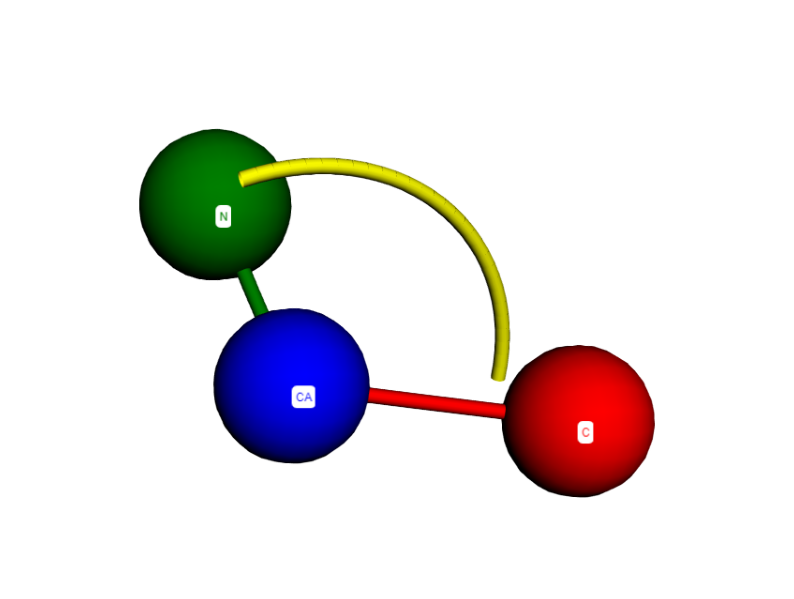

In [14]:
image_path = "./results/ej_2_b.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (c) Muestre por pantalla la cadena y el residuo del átomo que se encuentra justo en la mitad de la lista.

In [15]:
middle_index = num_atoms // 2
middle_atom = atoms[middle_index]

residue = middle_atom.get_parent()
chain = residue.get_parent()
chain_id = chain.get_id()
residue_id = residue.get_id()
residue_name = residue.get_resname()
residue_number = residue_id[1]

print(f"Átomo central (Índice {middle_index}): {middle_atom.get_name()}")
print(f"Cadena: {chain_id}")
print(f"Residuo: {residue_name} (Número: {residue_number})")

Átomo central (Índice 551): N
Cadena: A
Residuo: PRO (Número: 70)


In [19]:
central_atom_serial = int(middle_atom.get_serial_number())
central_atom_name = middle_atom.get_name()
central_atom_coords = middle_atom.get_coord()

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')

for chain_id, color in colours.items():
    view.addStyle({'chain': chain_id}, {'cartoon': {'color': color, 'opacity': 0.6}})

view.addStyle({'resn': 'HEM'}, {'stick': {'colorscheme': 'redCarbon'}})
view.addStyle({'serial': central_atom_serial}, {
    'sphere': {'radius': 0.9, 'color': 'blue'},
    'stick': {'color': 'blue'}
})
view.addLabel(central_atom_name, {
    'position': {
        'x': float(central_atom_coords[0]),
        'y': float(central_atom_coords[1]),
        'z': float(central_atom_coords[2])
    },
    'backgroundColor': 'white',
    'fontColor': 'blue',
    'fontSize': 16,
    'fontFamily': 'Arial'
})
view.addStyle({'chain': chain_id, 'resi': residue_number}, {
    'cartoon': {
        'color': 'orange',
        'opacity': 0.8
    }
})
view.addLabel(f"{residue_name} {residue_number}", {
    'position': {
        'x': float(residue['CA'].get_coord()[0]),
        'y': float(residue['CA'].get_coord()[1]),
        'z': float(residue['CA'].get_coord()[2])
    },
    'backgroundColor': 'white',
    'fontColor': 'orange',
    'fontSize': 16,
    'fontFamily': 'Arial'
})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

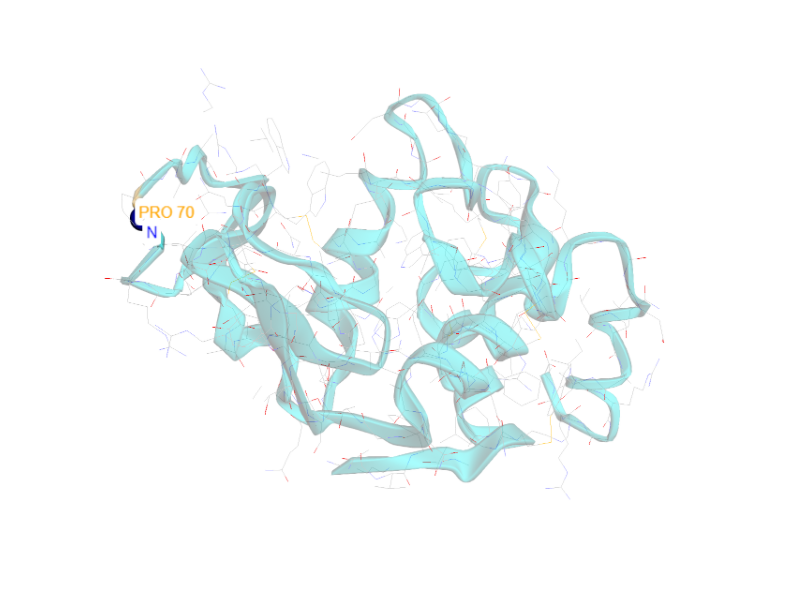

In [20]:
image_path = "./results/ej_2_c.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()